In [5]:
shapefile_path = "2daysshapefile/sigmets_202404180000_202404200000.shp"
csv_path = "sigmets_202404180000_202404200000.csv"

Invalid inpasdnjashjkdbut. Please enter a valid integer index. Error
asda
Invalid input. Please enter a valid integer index. Error: Axis limits cannot be NaN or Inf


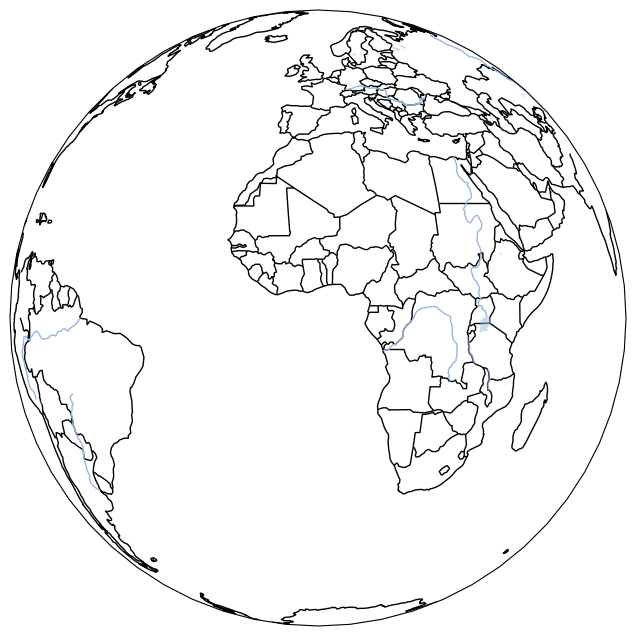

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.image import imread
import xarray as xr
import numpy as np

ds = xr.open_dataset('ben.nc')
png_file = "OR_ABI-L1b-RadC-M6C05_G16_s20240791401170_e20240791403543_c20240791403596.png"

# Read the shapefile
gdf = gpd.read_file(shapefile_path)
# Sort the data by the "ISSUE" field
gdf = gdf.sort_values(by="ISSUE")

def update(frame, ds):
    print("asda")
    # Create a new figure and axis with Cartopy projection
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": ccrs.Orthographic(0.0,0.0)})
    # Add Cartopy borders and features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Set the extent of the map to focus on the United States
    ax.set_extent([-180, 180, -90, 90])

    # Get the current issue time
    current_issue = gdf.iloc[frame]["ISSUE"]

    # Filter the GeoDataFrame to include only the shapes active at the current issue time
    current_shapes = gdf[(gdf["ISSUE"] <= current_issue) & (gdf["EXPIRE"] > current_issue)]

    # Customize the plot (optional)
    ax.set_title(f"Shapefile Data\nIssue: {current_issue}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Plot the current shapes
    current_shapes.plot(ax=ax, markersize=5)

    # Get the latitude and longitude coordinates from the dataset
    lats = ds.y.values * 1000
    lons = ds.x.values * 1000
    
    rad_values = ds.Rad.values
    
    lat_step = len(lats) // 100
    lon_step = len(lons) // 100
    
    lat_indices, lon_indices = np.meshgrid(np.arange(0, len(lats), lat_step),
                                           np.arange(0, len(lons), lon_step))

        # Flatten the indices
    lat_indices_flat = lat_indices.flatten()
    lon_indices_flat = lon_indices.flatten()

    # Get the corresponding latitude, longitude, and Rad values for the selected points
    selected_lats = lats[lat_indices_flat]
    selected_lons = lons[lon_indices_flat]
    selected_rad_values = rad_values[lat_indices_flat, lon_indices_flat]
    
    finite_mask = np.isfinite(selected_lats) & np.isfinite(selected_lons) & np.isfinite(selected_rad_values)
    selected_lats = selected_lats[finite_mask]
    selected_lons = selected_lons[finite_mask]
    selected_rad_values = selected_rad_values[finite_mask]
    
    print("sdfsd", np.isnan(selected_lats).any())
    print(np.isnan(selected_lons).any())
    print(np.isnan(selected_rad_values).any())
    print(np.isinf(selected_lats).any())
    print(np.isinf(selected_lons).any())
    print(np.isinf(selected_rad_values).any())

    # Normalize the Rad values to the range [0, 1]
    # normalized_rad_values = (selected_rad_values - np.min(selected_rad_values)) / (np.max(selected_rad_values) - np.min(selected_rad_values))

    # Create a colormap
    cmap = plt.cm.coolwarm

    for lat, lon, rad_value in zip(selected_lats, selected_lons, selected_rad_values):
        color = cmap(rad_value)
        ax.plot(lon, lat, 'o', markersize=1, color=color, transform=ccrs.PlateCarree())

    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array(selected_rad_values)
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("Normalized Rad Values")

    # Display the plot
    plt.tight_layout()
    plt.show()


print(f"Invalid inpasdnjashjkdbut. Please enter a valid integer index. Error")
while True:
    # Prompt the user to enter the index
    index = input("Enter the index of the shape to display (or 'q' to quit): ")
    if index.lower() == 'q':
        break
    try:
        index = int(index)
        if 0 <= index < len(gdf):
            update(index, ds)
        else:
            print(f"Invalid index. Please enter a value between 0 and {len(gdf) - 1}.")
    except ValueError as e:
        print(f"Invalid input. Please enter a valid integer index. Error: {str(e)}")

In [7]:
print(f"Number of records in gdf: {len(gdf)}")
print(f"Column names in gdf: {gdf.columns}")

Number of records in gdf: 186
Column names in gdf: Index(['NAME', 'LABEL', 'TYPE', 'ISSUE', 'EXPIRE', 'geometry'], dtype='object')
